In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-dataset/sales_data.csv


In [2]:
#Pushing it to github from Kaggle API
!pip install kaggle

In [3]:
df_main=pd.read_csv("/kaggle/input/sales-dataset/sales_data.csv")
df_main.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


**DATA WRANGLING**

The following code shows how to clean the dataset, set the index, and check whether any columns have missing values or duplicates. 


In [4]:
print(df_main.columns)

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')


In [5]:
df_main.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [7]:
df_main.set_index("Product_ID", inplace=True)

In [8]:
df_main.head()

,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
Product_ID,,,,,,,,,,,,,
1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [9]:
df_main.isnull().sum()

Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [10]:
# Replacing the missing values
df_main.replace("?", np.nan, inplace=True)
df_main.head()

,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
Product_ID,,,,,,,,,,,,,
1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [11]:
#calculating the mean/sum of the following columns-> Sales_Amount, Unit_cost, Unit_Price
total_sales_amount=df_main["Sales_Amount"].sum(axis=0).astype(float)
print("Total Sale is", total_sales_amount)

avg_unit_cost=df_main["Unit_Cost"].astype(float).mean(axis=0)
print("Averag Unit cost is", avg_unit_cost)

avg_unit_price=df_main["Unit_Price"].astype(float).mean(axis=0)
print("Average Unit Price is", avg_unit_price)

Total Sale is 5019265.23
Averag Unit cost is 2475.30455
Average Unit Price is 2728.44012


In [12]:
#We can see which product category and which region is the most common type
a=df_main["Product_Category"].value_counts().idxmax()
b=df_main["Region_and_Sales_Rep"].value_counts().idxmax()
print(a,"&",b)

Clothing & North-Eve


In [13]:
df_main.dtypes

Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object

In [14]:
#Normalizing the discount column
df_main["Discount"]=df_main["Discount"]/df_main["Discount"].max()

In [15]:
dummy_variable_1 = pd.get_dummies(df_main["Payment_Method"])
dummy_variable_1.head()

,Bank Transfer,Cash,Credit Card
Product_ID,,,
1052,False,True,False
1093,False,True,False
1015,True,False,False
1072,False,False,True
1061,False,False,True


**Regression Models**

We will try to perform Linear Regression on different columns on this dataset.

In [16]:
df_main.head()

,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
Product_ID,,,,,,,,,,,,,
1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.300000,Cash,Online,North-Bob
1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.366667,Cash,Retail,West-Bob
1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.666667,Bank Transfer,Retail,South-David
1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.066667,Credit Card,Retail,South-Bob
1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.266667,Credit Card,Online,East-Charlie


In [17]:
df_main[["Discount", "Sales_Amount"]].corr()

,Discount,Sales_Amount
Discount,1.000000,0.023153
Sales_Amount,0.023153,1.000000


In [18]:
from sklearn.linear_model import LinearRegression
lm_1=LinearRegression()
lm_1


LinearRegression()

In [19]:
x=df_main[["Sales_Amount"]]
y=df_main["Discount"]
lm_1.fit(x,y)
Y_hat=lm_1.predict(x)
a=lm_1.coef_
b=lm_1.intercept_
print("Coefficient is:",a)
print("Intercept is:", b)
#Finding the Rsquare value
r_squared=lm_1.score(x,y)
print("R square value is:", r_squared)


Coefficient is: [2.36395991e-06]
Intercept is: 0.4961013248892296
R square value is: 0.0005360476720054352


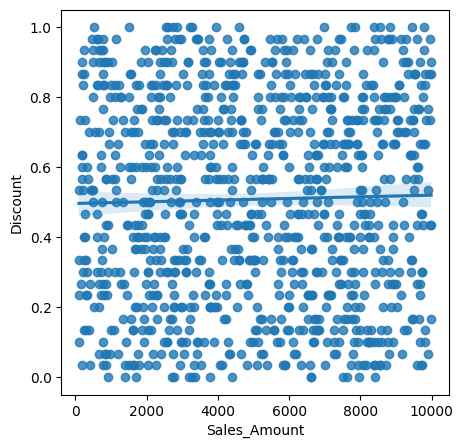

In [20]:
#Plotting a regression plot to visualise our Linear Regression model
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.regplot(x="Sales_Amount", y="Discount", data=df_main)
plt.show()

The R squared value is almost equal to zero which shows a weak or no correlation. This means maybe x is not influencing y.

Let's try with another two variables

In [21]:
lm_2=LinearRegression()
lm_2

LinearRegression()

Coefficient is: [-8.36377795]
Intercept is: 5231.328819827592
R square value is: 0.0017304522560817048


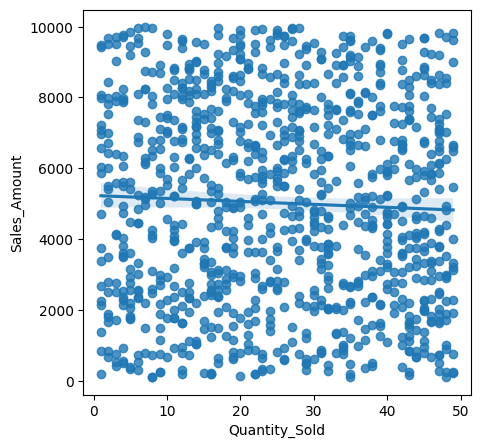

In [22]:
x=df_main[["Quantity_Sold"]]
y=df_main["Sales_Amount"]
lm_2.fit(x,y)
Y_hat=lm_2.predict(x)
a=lm_2.coef_
b=lm_2.intercept_
print("Coefficient is:",a)
print("Intercept is:", b)
#Finding the Rsquare value
r_squared=lm_2.score(x,y)
print("R square value is:", r_squared)
plt.figure(figsize=(5,5))
sns.regplot(x="Quantity_Sold", y="Sales_Amount", data=df_main)
plt.show()